In [3]:
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [1]:
!pip install nltk==3.8.1

import nltk
print(nltk.__version__)

3.8.1


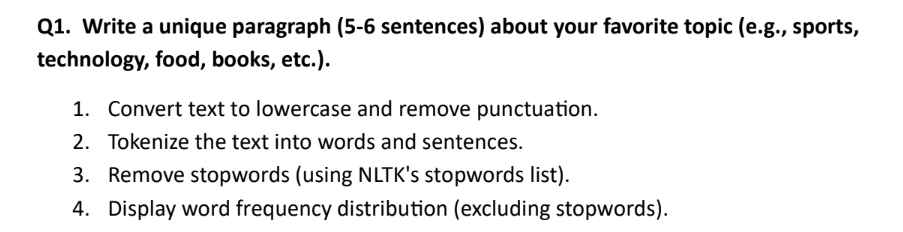

In [5]:
text = "Technology is evolving rapidly. I love exploring state-of-the-art innovations. Artificial Intelligence (AI), blockchain, and robotics fascinate me. These technologies have the power to transform industries. With each passing year, devices are becoming smarter and more connected."

text_clean = re.sub(r'[^\w\s\-]', '', text.lower())

words = word_tokenize(text_clean)
sentences = sent_tokenize(text)

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

word_freq = Counter(filtered_words)

print(text_clean)
print()
print(words)
print()
print(sentences)
print()
print(filtered_words)
print()
print(word_freq)


technology is evolving rapidly i love exploring state-of-the-art innovations artificial intelligence ai blockchain and robotics fascinate me these technologies have the power to transform industries with each passing year devices are becoming smarter and more connected

['technology', 'is', 'evolving', 'rapidly', 'i', 'love', 'exploring', 'state-of-the-art', 'innovations', 'artificial', 'intelligence', 'ai', 'blockchain', 'and', 'robotics', 'fascinate', 'me', 'these', 'technologies', 'have', 'the', 'power', 'to', 'transform', 'industries', 'with', 'each', 'passing', 'year', 'devices', 'are', 'becoming', 'smarter', 'and', 'more', 'connected']

['Technology is evolving rapidly.', 'I love exploring state-of-the-art innovations.', 'Artificial Intelligence (AI), blockchain, and robotics fascinate me.', 'These technologies have the power to transform industries.', 'With each passing year, devices are becoming smarter and more connected.']

['technology', 'evolving', 'rapidly', 'love', 'explo

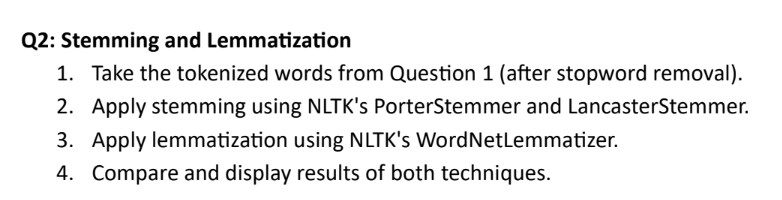

In [6]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

porter_stems = [porter.stem(word) for word in filtered_words]
lancaster_stems = [lancaster.stem(word) for word in filtered_words]
lemmas = [lemmatizer.lemmatize(word) for word in filtered_words]

print(porter_stems)
print(lancaster_stems)
print(lemmas)


['technolog', 'evolv', 'rapidli', 'love', 'explor', 'state-of-the-art', 'innov', 'artifici', 'intellig', 'ai', 'blockchain', 'robot', 'fascin', 'technolog', 'power', 'transform', 'industri', 'pass', 'year', 'devic', 'becom', 'smarter', 'connect']
['technolog', 'evolv', 'rapid', 'lov', 'expl', 'state-of-the-art', 'innov', 'art', 'intellig', 'ai', 'blockchain', 'robot', 'fascin', 'technolog', 'pow', 'transform', 'industry', 'pass', 'year', 'dev', 'becom', 'smart', 'connect']
['technology', 'evolving', 'rapidly', 'love', 'exploring', 'state-of-the-art', 'innovation', 'artificial', 'intelligence', 'ai', 'blockchain', 'robotics', 'fascinate', 'technology', 'power', 'transform', 'industry', 'passing', 'year', 'device', 'becoming', 'smarter', 'connected']


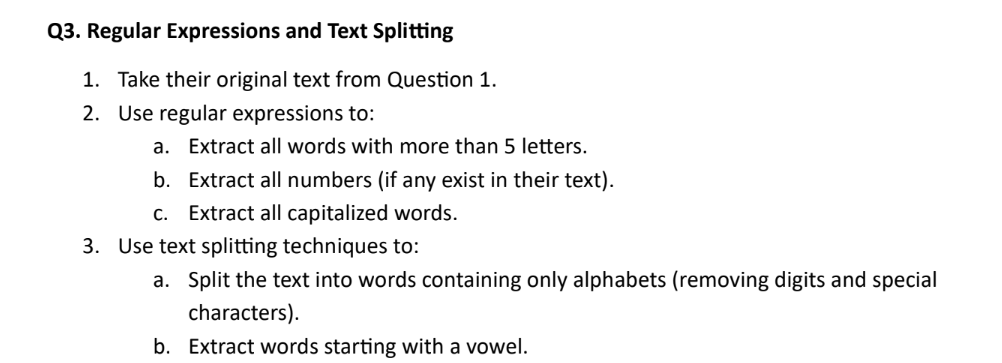

In [7]:
original_text = text

long_words = re.findall(r'\b\w{6,}\b', original_text)
numbers = re.findall(r'\b\d+\b', original_text)
capitalized = re.findall(r'\b[A-Z][a-z]*\b', original_text)
alpha_words = re.findall(r'\b[a-zA-Z]+\b', original_text)
vowel_words = [word for word in alpha_words if word.lower().startswith(('a', 'e', 'i', 'o', 'u'))]

print(long_words)
print(numbers)
print(capitalized)
print(alpha_words)
print(vowel_words)


['Technology', 'evolving', 'rapidly', 'exploring', 'innovations', 'Artificial', 'Intelligence', 'blockchain', 'robotics', 'fascinate', 'technologies', 'transform', 'industries', 'passing', 'devices', 'becoming', 'smarter', 'connected']
[]
['Technology', 'I', 'Artificial', 'Intelligence', 'These', 'With']
['Technology', 'is', 'evolving', 'rapidly', 'I', 'love', 'exploring', 'state', 'of', 'the', 'art', 'innovations', 'Artificial', 'Intelligence', 'AI', 'blockchain', 'and', 'robotics', 'fascinate', 'me', 'These', 'technologies', 'have', 'the', 'power', 'to', 'transform', 'industries', 'With', 'each', 'passing', 'year', 'devices', 'are', 'becoming', 'smarter', 'and', 'more', 'connected']
['is', 'evolving', 'I', 'exploring', 'of', 'art', 'innovations', 'Artificial', 'Intelligence', 'AI', 'and', 'industries', 'each', 'are', 'and']


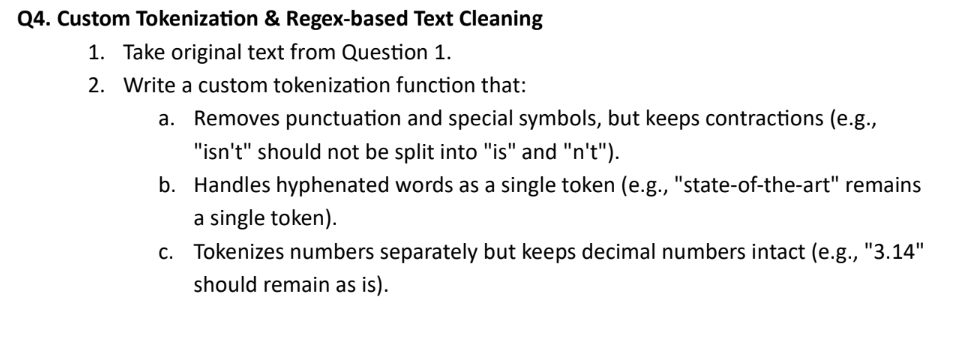

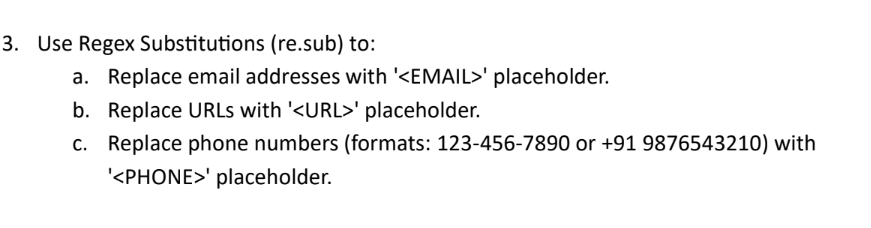

In [8]:
def custom_tokenizer(text):
    text = re.sub(r"(?!\b[\w'-]+\b)[^\w\s.-]", '', text)
    tokens = re.findall(r"\b\w+(?:[-.]\w+)*\b", text)
    return tokens

tokens_custom = custom_tokenizer(text)

text_sub = text
text_sub = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '<EMAIL>', text_sub)
text_sub = re.sub(r'https?://\S+|www\.\S+', '<URL>', text_sub)
text_sub = re.sub(r'\b(?:\+91[-\s]?)?\d{10}\b|\d{3}[-\s]?\d{3}[-\s]?\d{4}', '<PHONE>', text_sub)

print(tokens_custom)
print(text_sub)


['Technology', 'is', 'evolving', 'rapidly', 'I', 'love', 'exploring', 'state-of-the-art', 'innovations', 'Artificial', 'Intelligence', 'AI', 'blockchain', 'and', 'robotics', 'fascinate', 'me', 'These', 'technologies', 'have', 'the', 'power', 'to', 'transform', 'industries', 'With', 'each', 'passing', 'year', 'devices', 'are', 'becoming', 'smarter', 'and', 'more', 'connected']
Technology is evolving rapidly. I love exploring state-of-the-art innovations. Artificial Intelligence (AI), blockchain, and robotics fascinate me. These technologies have the power to transform industries. With each passing year, devices are becoming smarter and more connected.
